<a href="https://colab.research.google.com/github/kkiprono4/Mchezopesa-Ltd/blob/main/Machine_learning_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

## a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

## b) Defining the Metric for Success

### Approach 1: Polynomial approach

Be able to Predict how many goals the home team scores. Be able to Predict how many goals the away team scores.

### Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw 

## c) Understanding the context

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

## d) Recording the Experimental Design

* Reading the data

* Previewing the 2 datasets

* Perform data cleaning

* Merging the dataset

* Performing EDA

* Perform polynomial and logistic regression

* Check for residuals and also test for heteroskedasticity

* Compute the accuracy of the models

## e) Data Relevance

The data provided is relevant since it has all the data that is needed for analysis and building a model for prediction

# Importing the neceessary libraries

In [1]:
#Import the libraries to be used
#Numpy is a library for python that supports multidimensional arrays and matrices as well as mathematical functions
import numpy as np
#Pandas is Python library used for data manipulation and data analysis
import pandas as pd
#Matplotlib is a python library utilised in plotting and its numerical capabilities
import matplotlib.pyplot as plt
#Seaborn is a Python data visualisation library basrd on matplotlib.
import seaborn as sns
#Is a function in Sklearn for splitting data into two subsets: training set and testing set 
from sklearn.model_selection import train_test_split
#This is used to import linearregression model
from sklearn.linear_model import LinearRegression
#This is used to import the LogisticRegression model
from sklearn.linear_model import LogisticRegression 

# Loading the datasets

In [2]:
#loading the datasets
results = pd.read_csv('/content/results.csv')
fifa = pd.read_csv('/content/fifa_ranking.csv')

In [3]:
#Lets inspect the first 10 columns in the Fifa_ranking Dataset
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [4]:
#inspecting the last 10 items in the Fifa_ranking Dataset
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [5]:
#Lets inspect the first 10 columns in the results Dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
#inspecting the last 10 items in the results Dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [7]:
#Our Datasets information
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [8]:
#Data information of results
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [9]:
#Fifa columns
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [10]:
#checking shape of the  fifa dataset
fifa.shape

(57793, 16)

57793 records and 16 variables

In [11]:
#checking shape of the results dataset
results.shape

(40839, 9)

40839 records and 9 variables

In [12]:
#summary statistics of the fifa dataset
fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [13]:
#summarry statistics of the results dataset
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


# Tidying the Dataset

In [14]:
# Identifying the Missing Data
#rankings
fifa.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [15]:
# Identifying the Missing Data
#Results 
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [16]:

#checking for duplicates
fifa.duplicated().sum()

37

In [17]:
#Dealing with duplicates
fifa.drop_duplicates(inplace=True)

In [18]:
#checking to confirm duplicates have been dropped
fifa.duplicated().sum()

0

In [19]:
#checking for duplicates
results.duplicated().sum()

0

In [20]:
#renaming column names country on the rankings table
fifa.rename(columns={'country_full': 'country',"rank_date":"date"}, inplace=True)
#converting date column to date tyme datatype
fifa.date = pd.to_datetime(fifa.date)
# Locating the year from the rank date 
fifa['year'] = fifa.date.dt.year
fifa['month'] =fifa.date.dt.month
fifa.head(1)

,rank,country,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date,year,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993,8


In [21]:
# results dataset
#converting date column to date tyme datatype
results.date = pd.to_datetime(results.date)
# Locating the year from the rank date 
results['year'] = results.date.dt.year
results['month'] =results.date.dt.month
results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11


In [22]:
# we notice that the ranking dataset started in 1993 and results started in 1872
# therefore we can drop all the data before 1993 in the results dataset
results = results[results['year'] >= 1993]
results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,1


In [23]:
# Dropping the irrelevant columns from  our datasets
results.drop(columns =['city','date'])
results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,1


In [24]:
# Dropping the irrelevant columns from  our datasets
# ranking dataset
fifa.drop(columns = ["total_points","previous_points","rank_change","month","confederation", "country_abrv",'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',	"three_year_ago_avg","three_year_ago_weighted"],inplace=True)
fifa.head(1)


,rank,country,date,year
0,1,Germany,1993-08-08,1993


# Merging the datasets

In [25]:
#merging the rankings and results dataset
# We create a dataframe to get the away team rank
rank_away = pd.merge(fifa, results, left_on= ['date', 'country'], right_on= ['date', 'away_team'], how='inner')
rank_away.head(1)

,rank,country_x,date,year_x,home_team,away_team,home_score,away_score,tournament,city,country_y,neutral,year_y,month
0,5,Argentina,1993-08-08,1993,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8


In [26]:
# We then drop the unnecessary columns
rank_away.drop(['country_x', 'year_x'], axis=1, inplace=True)
rank_away.head(1)

,rank,date,home_team,away_team,home_score,away_score,tournament,city,country_y,neutral,year_y,month
0,5,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8


In [27]:
# Rename the country column and the rank to home team rank
rank_away.rename({'country_y':'country'}, axis=1, inplace=True)
rank_away.rename({'rank':'away_team_rank'}, axis=1, inplace=True)
rank_away.head(1)

,away_team_rank,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_y,month
0,5,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,1993,8


In [28]:
#merging the rankings and results dataset
# so as to create home team rank 
rank_home = pd.merge(fifa, results, left_on= ['date', 'country'], right_on= ['date','home_team'], how='inner')
rank_home.head(1)

,rank,country_x,date,year_x,home_team,away_team,home_score,away_score,tournament,city,country_y,neutral,year_y,month
0,8,Brazil,1993-08-08,1993,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8


In [29]:
# We then drop the unnecessary columns
rank_home.drop(['country_x','year_x'], axis=1, inplace=True)

# Rename the country column and the rank to home team rank
rank_home.rename({'country_y':'country'}, axis=1, inplace=True)
rank_home.rename({'rank':'home_team_rank'}, axis=1, inplace=True)
rank_home.head(1)

,home_team_rank,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year_y,month
0,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8


In [30]:
# Lets merge the two datasets to get a general dataset that has both the home rank and away rank
df = pd.merge(rank_home, rank_away, how = 'inner', left_on=['date','home_team', 'away_team','home_score','away_score'], right_on=['date','home_team','away_team', 'home_score', 'away_score'])
df.head(1)

,home_team_rank,date,home_team,away_team,home_score,away_score,tournament_x,city_x,country_x,neutral_x,year_y_x,month_x,away_team_rank,tournament_y,city_y,country_y,neutral_y,year_y_y,month_y
0,8,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False,1993,8,14,Friendly,Maceió,Brazil,False,1993,8


In [31]:
# Lets drop the redundant columns 
df.drop(['city_x','tournament_x','country_x','neutral_x','year_y_x','month_x'], axis = 1, inplace=True)

# Lets also rename the remaining columns
df.rename({'tournament_y':'tournament'}, axis = 1, inplace=True)
df.rename({'country_y':'country'}, axis = 1, inplace=True)
df.rename({'neutral_y':'neutral'}, axis = 1, inplace=True)
df.rename({'year_y_y':'year'}, axis = 1, inplace=True)
df.rename({'city_y':'city'}, axis = 1, inplace=True)
df.rename({'month_y':'month'}, axis = 1, inplace=True)

df.head(1)

,home_team_rank,date,home_team,away_team,home_score,away_score,away_team_rank,tournament,city,country,neutral,year,month
0,8,1993-08-08,Brazil,Mexico,1,1,14,Friendly,Maceió,Brazil,False,1993,8


In [32]:
#checking missing values
df.isnull().sum()

home_team_rank    0
date              0
home_team         0
away_team         0
home_score        0
away_score        0
away_team_rank    0
tournament        0
city              0
country           0
neutral           0
year              0
month             0
dtype: int64

In [33]:
# creating a colum with status (win,lose,draw)
# Creating a list to display the conditions of the match
# from the home team's perspective 

condition  = [
              
    (df['home_score'] == df['away_score']),         
    (df['home_score'] < df['away_score']),
    (df['home_score'] > df['away_score'])

    ]

# the status we want to assign the conditions
status = ['Draw','Lose','Win']

# Creating a new column and use np.select to assign values to it using our lists 
df['status'] = np.select(condition, status)
df.head(2)

,home_team_rank,date,home_team,away_team,home_score,away_score,away_team_rank,tournament,city,country,neutral,year,month,status
0,8,1993-08-08,Brazil,Mexico,1,1,14,Friendly,Maceió,Brazil,False,1993,8,Draw
1,35,1993-08-08,Ecuador,Venezuela,5,0,94,FIFA World Cup qualification,Quito,Ecuador,False,1993,8,Win


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


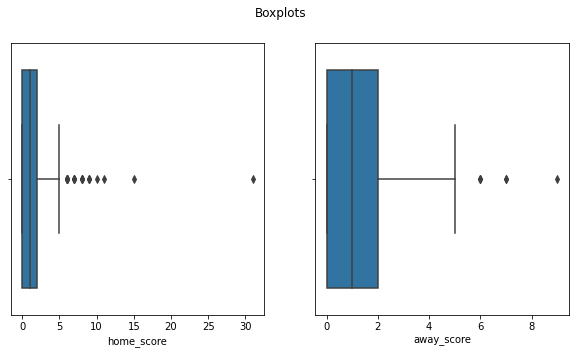

In [34]:
# Checking for outliers in the home and away scores
fig, axes = plt.subplots(1,2, figsize=(10, 5))
fig.suptitle('Boxplots')
sns.boxplot(df['home_score'], ax=axes[0])
sns.boxplot(df['away_score'], ax=axes[1])
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


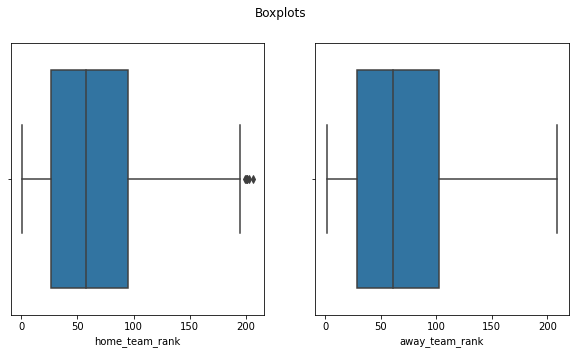

In [35]:
# Checking for outliers in the home and away ranking
fig, axes = plt.subplots(1,2, figsize=(10, 5))
fig.suptitle('Boxplots')
sns.boxplot(df['home_team_rank'], ax=axes[0])
sns.boxplot(df['away_team_rank'], ax=axes[1])
plt.show();

we have outliers but we shall not drop them since they might be useful in our analysis

# Exploratory Analysis

##  Univariate analysis

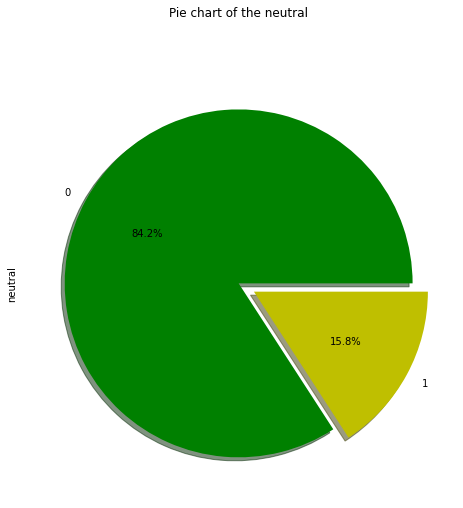

In [99]:
#Categorical variables
# Pie chart for neutral
df['neutral'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['g','y'],figsize=(10,8),autopct='%1.1f%%')
plt.title("Pie chart of the neutral", y=1.1)
plt.show()

67.8 % of the matches played were not in a neutral ground

32.2 % of the matches played were in a neutral ground

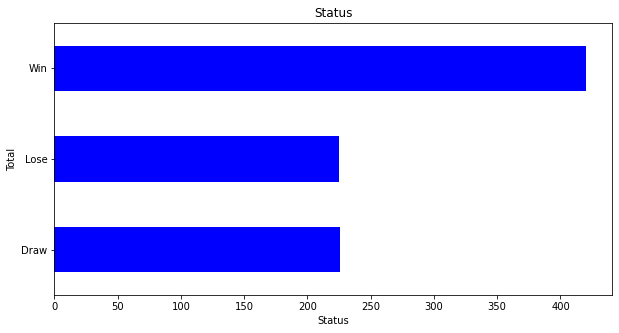

In [37]:
# Bar chart on Status
plt.figure(figsize = (10,5))
df.groupby('status').size().plot(kind='barh', color='blue')
plt.title('Status')
plt.ylabel('Total')
plt.xlabel('Status')
plt.show()

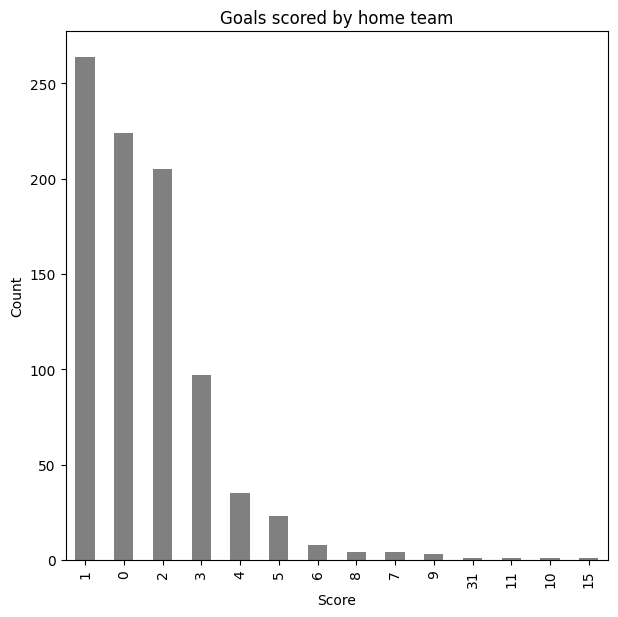

In [38]:
#creating a bar graph of the home score
plt.figure(figsize = (7,7), dpi = 100)
df.home_score.value_counts().plot(kind= 'bar',color='Grey')
plt.title('Goals scored by home team')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

Most fo the Home team scored 1 goal in different matches 

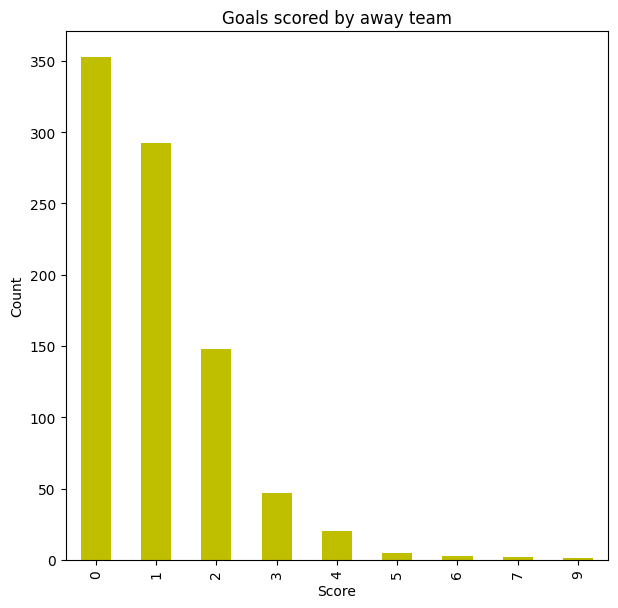

In [39]:
#creating a bar graph of the away score
plt.figure(figsize = (7,7), dpi = 100)
df.away_score.value_counts().plot(kind= 'bar',color='y')
plt.title('Goals scored by away team')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

Majority of the away teams did not score a goal 

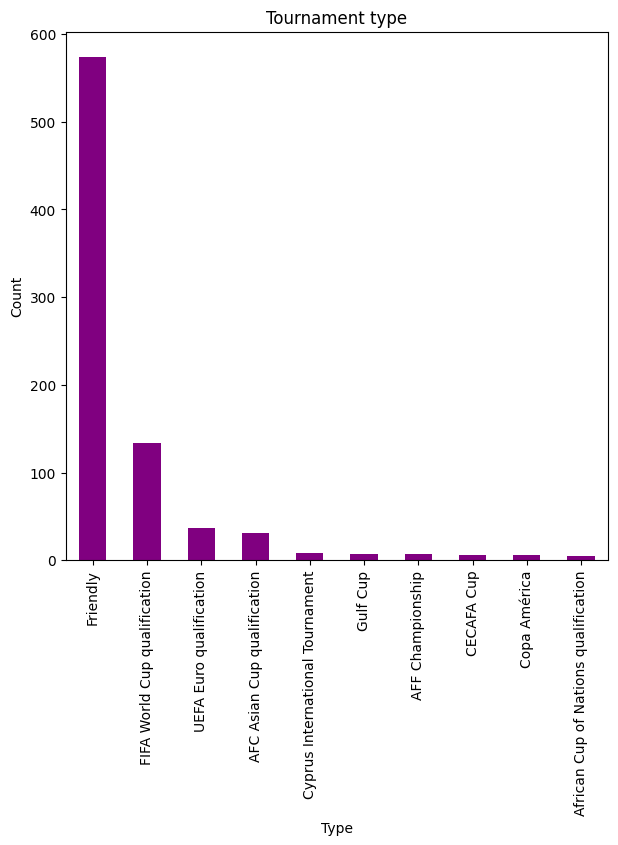

In [40]:
#creating a bar graph of the tournament sponsor
plt.figure(figsize = (7,7), dpi = 100)
df.tournament.value_counts().head(10).plot(kind= 'bar',color='purple')
plt.title('Tournament type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

UEFA organised most of the matches that were played

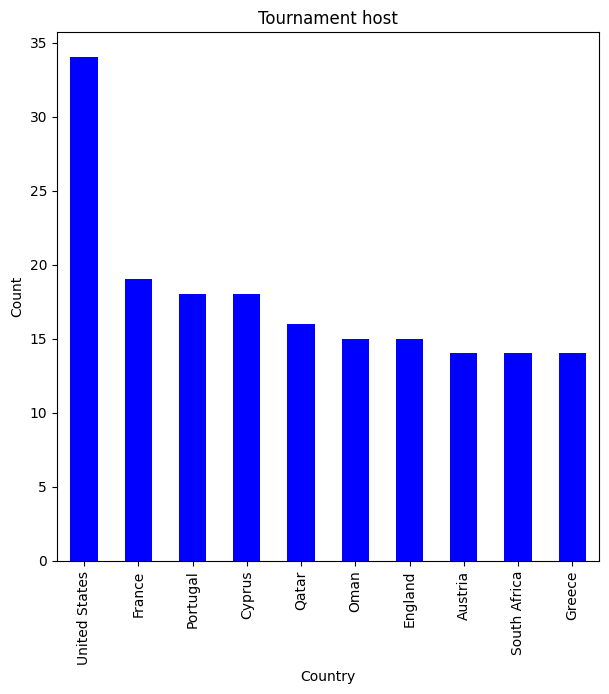

In [41]:
#creating a bar graph of the tournament host
plt.figure(figsize = (7,7), dpi = 100)
df.country.value_counts().head(10).plot(kind= 'bar',color='blue')
plt.title('Tournament host')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

Most matches were played in the United states

In [42]:
numerical_col = ['home_team_rank','home_score','away_score','away_team_rank']

In [43]:
# Checking the median, mode, varaince, skewness and kurtosis of our dataframe
for i in numerical_col:
  print('The median of', i, 'is:')
  print(df[i].median())
  print('The mode of', i, 'is:')
  print(df[i].mode())
  print('The variance of', i, 'is:')
  print(df[i].var())
  print('The skewness of', i, 'is:')
  print(df[i].skew())
  print('The kurtosis of', i, 'is:')
  print(df[i].kurt())
  print('                                    ')

The median of home_team_rank is:
58.0
The mode of home_team_rank is:
0    33
dtype: int64
The variance of home_team_rank is:
2261.762732755319
The skewness of home_team_rank is:
0.753086815423578
The kurtosis of home_team_rank is:
-0.14882953993501147
                                    
The median of home_score is:
1.0
The mode of home_score is:
0    1
dtype: int64
The variance of home_score is:
3.632682740145451
The skewness of home_score is:
5.524378027487252
The kurtosis of home_score is:
68.55786471188763
                                    
The median of away_score is:
1.0
The mode of away_score is:
0    0
dtype: int64
The variance of away_score is:
1.3333122187471254
The skewness of away_score is:
1.7465685613790902
The kurtosis of away_score is:
5.24032836211406
                                    
The median of away_team_rank is:
61.0
The mode of away_team_rank is:
0    20
1    30
2    36
dtype: int64
The variance of away_team_rank is:
2550.0128878155638
The skewness of away_t

## Bivariate analysis

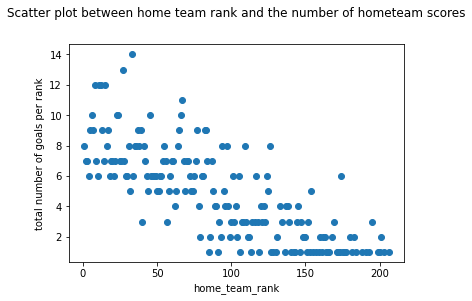

In [44]:
#creating a scatter plot for total number of goals per rank
grp=df.groupby('home_team_rank')['home_score'].count().reset_index(name='total number of goals per rank')
plt.scatter(grp["home_team_rank"] , grp['total number of goals per rank'])
plt.title("Scatter plot between home team rank and the number of hometeam scores", y=1.1)
plt.xlabel('home_team_rank')
plt.ylabel('total number of goals per rank')
plt.show()

we can see that as the rank increases the number of home team scores reduces

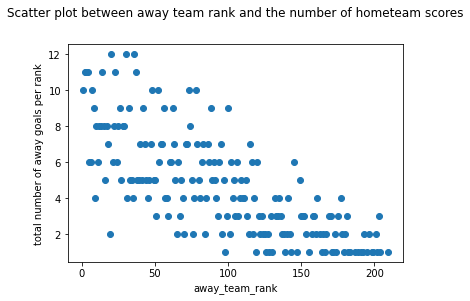

In [45]:
#creating a scatter plot for total number of goals per rank
grp=df.groupby('away_team_rank')['away_score'].count().reset_index(name='total number of away goals per rank')
plt.scatter(grp["away_team_rank"] , grp['total number of away goals per rank'])
plt.title("Scatter plot between away team rank and the number of hometeam scores", y=1.1)
plt.xlabel('away_team_rank')
plt.ylabel('total number of away goals per rank')
plt.show()

we can see that as the rank increases the number of away team scores reduces

In [46]:
#correlation between our variables 
df.corr()

,home_team_rank,home_score,away_score,away_team_rank,neutral,year,month
home_team_rank,1.000000,-0.043381,0.143060,0.534618,0.059212,0.212261,-0.086186
home_score,-0.043381,1.000000,-0.132413,0.309322,0.001156,-0.008058,-0.008227
away_score,0.143060,-0.132413,1.000000,-0.151524,0.088183,-0.044407,-0.008480
away_team_rank,0.534618,0.309322,-0.151524,1.000000,0.072782,0.268029,-0.028371
neutral,0.059212,0.001156,0.088183,0.072782,1.000000,0.093110,-0.111455
year,0.212261,-0.008058,-0.044407,0.268029,0.093110,1.000000,-0.063886
month,-0.086186,-0.008227,-0.008480,-0.028371,-0.111455,-0.063886,1.000000


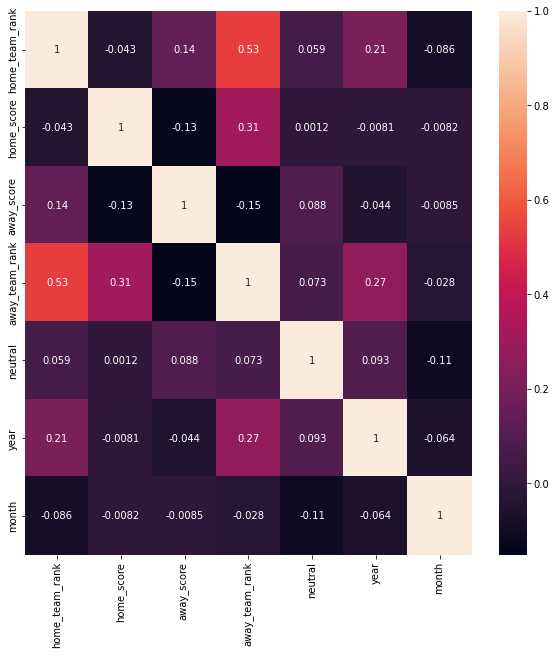

In [47]:
# Plot a heatmap
fig, heat = plt.subplots(figsize = (10,10))
heat = sns.heatmap(df.corr(), annot = True)

positive correlation between home team rank and away team rank

# Detecting Multicollinearity

In [48]:
#multicollinearity
# Pick independent variables only.
independent_only= df[["home_team_rank","year","month","away_team_rank","away_score","neutral","status"]]

# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_team_rank,year,month,away_team_rank,away_score,neutral
home_team_rank,1.530864,-0.110932,0.100589,-0.840947,-0.352547,0.023189
year,-0.110932,1.094722,0.045780,-0.221389,0.038161,-0.077510
month,0.100589,0.045780,1.022207,-0.048102,-0.020592,0.109028
away_team_rank,-0.840947,-0.221389,-0.048102,1.567134,0.354605,-0.080282
away_score,-0.352547,0.038161,-0.020592,0.354605,1.115310,-0.109133
neutral,0.023189,-0.077510,0.109028,-0.080282,-0.109133,1.033462


No multicolliniarity as the values are below 5

 # Polynomial Regression 

## Model 1 - Predicting Home score

In [49]:
#convert non numerical columns to numerical using lable ecncoding 
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['neutral']= en.fit_transform(df['neutral'])
df['status']= en.fit_transform(df['status'])

In [50]:
# Picking the columns needed for predicting home scores
#
# We first select the columns that we will use in our modelling
df1= df[["home_team","away_team","home_score","home_team_rank","away_team_rank","away_score","status"]]
df1.shape

(871, 7)

871 records and 7 variables

In [51]:
#picking the target and feature
X= df1[["home_team_rank","away_team_rank","away_score","status"]]
y=df1["home_score"]

In [52]:
# Split the dataset into train and test sets
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

### Baseline model

In [53]:
# Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)

In [54]:
# Evaluating the Algorithm
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(lin_reg_y_predicted,y_test)))

Root Mean Squared Error: 1.2110204931210515


### Optimize our model

#### Degree = 2

In [55]:
# Fit polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree = 2) 
X_poly = poly_reg2.fit_transform(X)


pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly, y)

LinearRegression()

In [56]:
# Predict using Polynomial Regression
poly_pred2 = pol_reg2.predict(poly_reg2.fit_transform([[1,2,3,4]]))
print('Polynomial prediction: %d' %poly_pred2)

# We can also get the predictions as an array
poly_arr_pred2 = pol_reg2.predict(poly_reg2.fit_transform(X))

Polynomial prediction: 19


In [57]:
pol_reg2  = LinearRegression()

Lin2 = pol_reg2 .fit(X_poly, y)

y_pred2= pol_reg2 .predict(poly_reg2.fit_transform(X_test))

In [58]:
# Evaluating the Algorithm
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred2,y_test)))

Root Mean Squared Error: 1.0057368653846686


#### Degree = 3

In [59]:
# Fit polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg3 = PolynomialFeatures(degree = 3) 
X_poly = poly_reg3.fit_transform(X)


pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly, y)

LinearRegression()

In [60]:
# Predict using Polynomial Regression
poly_pred3 = pol_reg3.predict(poly_reg3.fit_transform([[1,2,3,4]]))
print('Polynomial prediction: %d' %poly_pred3)

# We can also get the predictions as an array
poly_arr_pred3 = pol_reg3.predict(poly_reg3.fit_transform(X))

Polynomial prediction: 42


In [61]:
pol_reg3  = LinearRegression()

Lin3 = pol_reg3 .fit(X_poly, y)

y_pred3= pol_reg3 .predict(poly_reg3.fit_transform(X_test))

In [62]:
# Evaluating the Algorithm
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred3,y_test)))

Root Mean Squared Error: 0.9962653515604445


#### Degree = 4

In [63]:
# Fit polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg4.fit_transform(X)


pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly, y)

LinearRegression()

In [64]:
# Predict using Polynomial Regression
poly_pred4 = pol_reg4.predict(poly_reg4.fit_transform([[1,2,3,4]]))
print('Polynomial prediction: %d' %poly_pred4)

# We can also get the predictions as an array
poly_arr_pred4 = pol_reg4.predict(poly_reg4.fit_transform(X))

Polynomial prediction: 103


In [65]:
pol_reg4  = LinearRegression()

Lin4 = pol_reg4.fit(X_poly, y)

y_pred4= pol_reg4.predict(poly_reg4.fit_transform(X_test))

In [66]:
# Evaluating the Algorithm
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred4,y_test)))

Root Mean Squared Error: 0.9663620261962395


#### Degree = 6

In [67]:
# Fit polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg6 = PolynomialFeatures(degree = 6) 
X_poly = poly_reg6.fit_transform(X)


pol_reg6 = LinearRegression()
pol_reg6.fit(X_poly, y)

LinearRegression()

In [68]:
# Predict using Polynomial Regression
poly_pred6 = pol_reg6.predict(poly_reg6.fit_transform([[1,2,3,4]]))
print('Polynomial prediction: %d' %poly_pred6)
# We can also get the predictions as an array
poly_arr_pred6 = pol_reg6.predict(poly_reg6.fit_transform(X))

Polynomial prediction: 662


In [69]:
pol_reg6  = LinearRegression()

Lin6 = pol_reg6.fit(X_poly, y)

y_pred6= pol_reg6.predict(poly_reg6.fit_transform(X_test))

In [70]:
# Evaluating the Algorithm
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred6,y_test)))

Root Mean Squared Error: 0.8989219729265723


degree = 6 has the lowest RMSE (0.8989) compared to the baseline model (1.21)

In [71]:
#Residual
residuals = np.subtract(y_pred6, y_test)
# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.07177087885559226

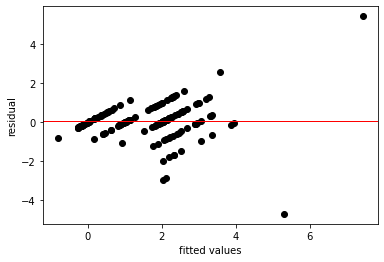

In [72]:
# Visualizing the residuals using a scatter plot 
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(y_pred6, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [73]:
# heteroskedasticity testing

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred6, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred6)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous')

0.00018278346839722948
the variances are homogeneous


## Model 2 - Predicting away score

### Baseline Model

In [100]:
#picking the target and feature
X1= df1[["home_team_rank","away_team_rank","home_score","status"]].values
y1=df1["away_score"].values

# Split the dataset into train and test sets
X1_train, X1_test,y1_train, y1_test = train_test_split(X1,y1, test_size = 0.2, random_state=0)

# Linear Regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X1_train, y1_train)
y1_pred = lin_reg_model.predict(X1_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_pred,y1_test)))

Root Mean Squared Error: 1.0317573568994225


### Optimize our model

#### Degree = 2

In [75]:
# Fit polynomial Regression to the dataset
poly_reg2 = PolynomialFeatures(degree = 2) 
X_poly = poly_reg2.fit_transform(X1)


pol_reg2 = LinearRegression()
pol_reg2.fit(X_poly, y1)

LinearRegression()

In [76]:
# Predict using Polynomial Regression
poly_pred2 = pol_reg2.predict(poly_reg2.fit_transform([[1,2,3,4]]))
print('Polynomial prediction: %d' %poly_pred2)

# We can also get the predictions as an array
poly_arr_pred2 = pol_reg2.predict(poly_reg2.fit_transform(X1))

Polynomial prediction: -17


In [77]:
pol_reg2  = LinearRegression()

Lin = pol_reg2 .fit(X_poly,y1)

y_pred2= pol_reg2.predict(poly_reg2.fit_transform(X1_test))

In [78]:
# Evaluating the Algorithm
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test,y_pred2)))

Root Mean Squared Error: 0.5871438961961968


#### Degree = 3

In [79]:
# Fit polynomial Regression to the dataset
poly_reg3 = PolynomialFeatures(degree = 3) 
X_poly = poly_reg3.fit_transform(X1)


pol_reg3 = LinearRegression()
pol_reg3.fit(X_poly, y1)

LinearRegression()

In [80]:
# Predict using Polynomial Regression
poly_pred3 = pol_reg3.predict(poly_reg3.fit_transform([[1,2,3,4]]))
print('Polynomial prediction: %d' %poly_pred3)

# We can also get the predictions as an array
poly_arr_pred3 = pol_reg3.predict(poly_reg3.fit_transform(X1))

Polynomial prediction: -34


In [81]:
pol_reg3  = LinearRegression()

Lin = pol_reg3 .fit(X_poly,y1)

y_pred3= pol_reg3.predict(poly_reg3.fit_transform(X1_test))

In [82]:
# Evaluating the Algorithm
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test,y_pred3)))

Root Mean Squared Error: 0.5860751314160694


#### Degree = 4

In [83]:
# Fit polynomial Regression to the dataset
poly_reg4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg4.fit_transform(X1)


pol_reg4 = LinearRegression()
pol_reg4.fit(X_poly, y1)

LinearRegression()

In [84]:
# Predict using Polynomial Regression
poly_pred4 = pol_reg4.predict(poly_reg4.fit_transform([[1,2,3,4]]))
print('Polynomial prediction: %d' %poly_pred4)

# We can also get the predictions as an array
poly_arr_pred4 = pol_reg4.predict(poly_reg4.fit_transform(X1))

Polynomial prediction: -106


In [85]:
pol_reg4 = LinearRegression()

Lin = pol_reg4.fit(X_poly,y1)

y_pred4 = pol_reg4.predict(poly_reg4.fit_transform(X1_test))

In [86]:
# Evaluating the Algorithm
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test,y_pred4)))

Root Mean Squared Error: 0.5734093278220652


Polynomial regression Model with 4 degrees has the lowest RSME (0.57) and performs slightly better than the linear regression model (1.03)



In [87]:
#Residual
residuals = np.subtract(y_pred4, y_test)
# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-0.5264996354689244

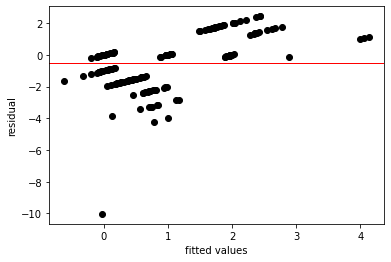

In [91]:
# Visualizing the residuals using a scatter plot 
# Using seaborn to plot
# labeling the title
# Labeling the x, and y axis.
# displaying the chart

plt.scatter(y_pred4, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [89]:
# heteroskedasticity testing

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred4, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred4)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous')

2.4673740550231093e-14
the variances are homogeneous


# Logistic Regression

In [92]:
#splitting our dataset
X = df1[["home_team_rank","home_score","away_team_rank","away_score","status"]].values
y = df1["status"].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [93]:
#Performing feature scaling:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Model Selection:
model = LogisticRegression()

#Fitting the model:
model.fit(X_train,y_train )

LogisticRegression()

In [94]:
#Predicting the value:
predictions = model.predict(X_test)

#Checking the accuracy:
print("Accuracy:",model.score(X_test, y_test ))

Accuracy: 1.0


In [95]:
#Confusion matrix:
predictions = model.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,predictions)
confusion_matrix

array([[52,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 83]])

52,40 and 83 were predicted correctly

# Challenging the solution

## cross validation

In [96]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

#picking the target and feature
X= df1[["home_team_rank","away_team_rank","away_score","status"]].values
y=df1["home_score"].values

folds = RepeatedKFold(n_splits=5, n_repeats=2)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] 
count = 0 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 10 folds
trained 10 models


1.5449588323963